In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns

In [106]:
data = pd.read_csv("data/housing.csv", sep=";")

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Datensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt
Teil 2
So wie Teil 1 nur mit kNeighborsRegression als Vorhersageverfahren

# Looking at the data

In [107]:
print(data.isnull().sum().sum()) #nr of nans
#data.isnull().values.any() # only gives true/false
print(data.shape)

207
(20640, 10)


In [108]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [109]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preprocessing

### Encoding categorical features

In [110]:
enc_labels = preprocessing.LabelEncoder()
enc_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read

In [111]:
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"])
print(new_ocean_prox)
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))

[3 3 3 ... 1 1 1]


In [112]:
data_new = pd.concat([data,new_ocean_df],axis=1)
display(data_new)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,0.0,0.0,0.0,1.0,0.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0.0,0.0,0.0,1.0,0.0


### (Replacing NaNs)

In [113]:
# replacing the 207 NaNs in column total_bedroom by mean of the column

In [114]:
"""
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new["total_bedrooms"])
    """

'\ndata_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)\nwith pd.option_context(\'display.max_rows\', 1000, \'display.max_columns\', 300): # shows more of the df\n    display(data_new["total_bedrooms"])\n    '

## Scatter matrices

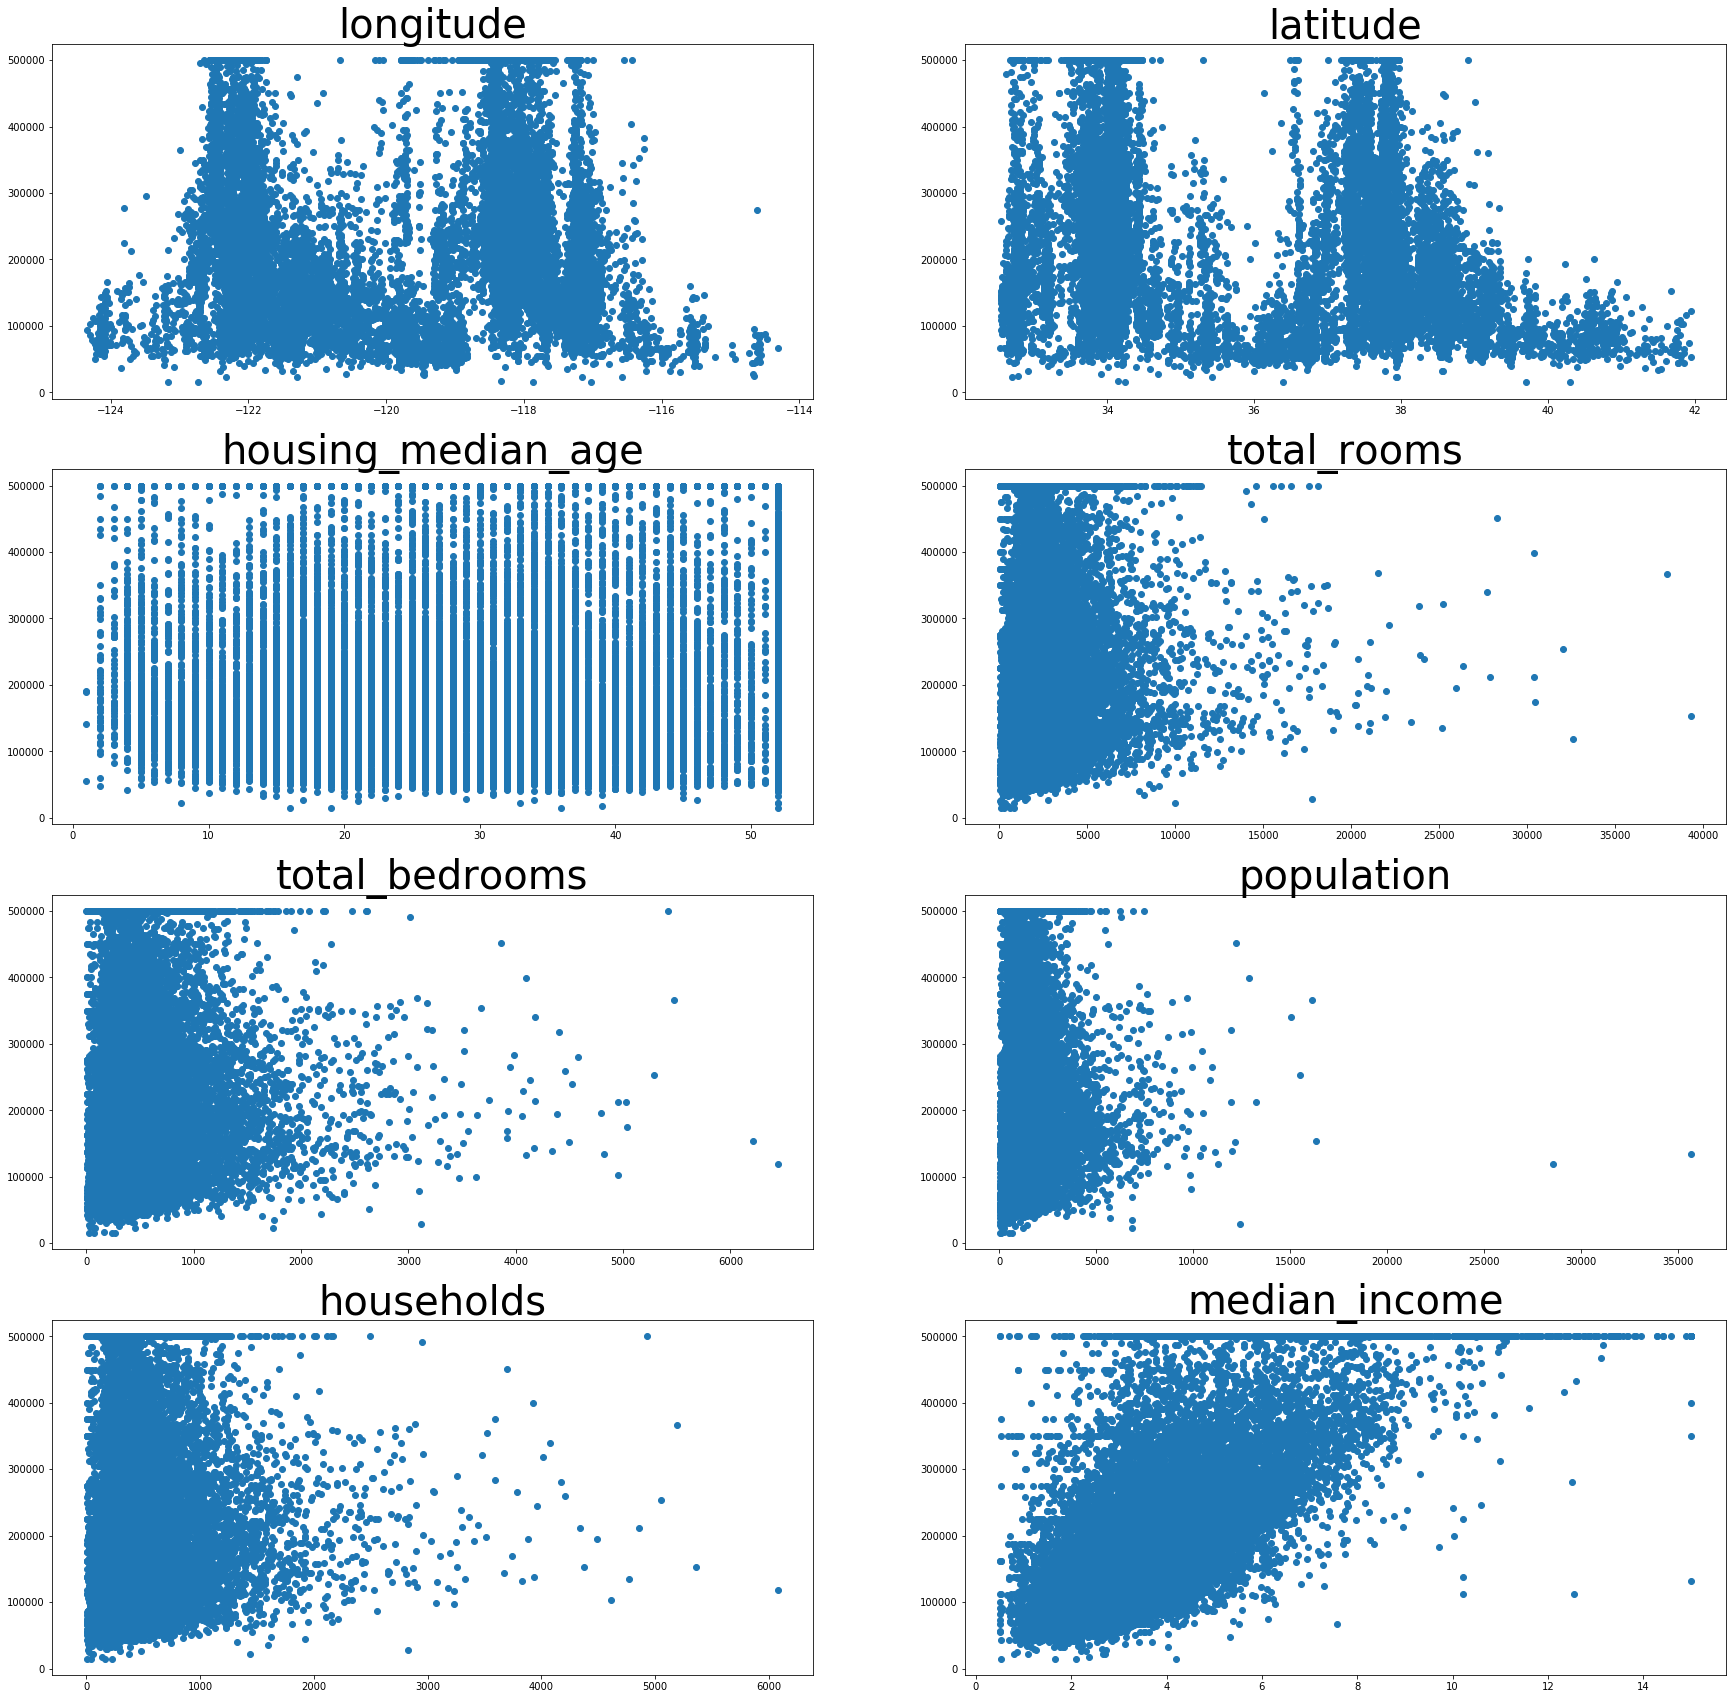

In [115]:
fig = plt.figure(figsize = (30,30))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data_new.iloc[:,col],data_new["median_house_value"])
    plt.title(data_new.columns[col],fontsize=40)

### Dropping rows with NaNs

In [116]:
data_new["total_bedrooms"].isnull().sum()

207

In [117]:
cols = data_new.columns.tolist()

In [118]:
data_new.dropna(inplace = True)
data_new.reset_index(inplace = True)
data_new.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0


In [119]:
data_new = data_new[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [120]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new)
data_new.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,0.0,0.0,0.0,1.0,0.0,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,0.0,0.0,0.0,1.0,0.0,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,0.0,0.0,0.0,1.0,0.0,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,0.0,0.0,0.0,1.0,0.0,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,0.0,0.0,0.0,1.0,0.0,261100


(20433, 14)

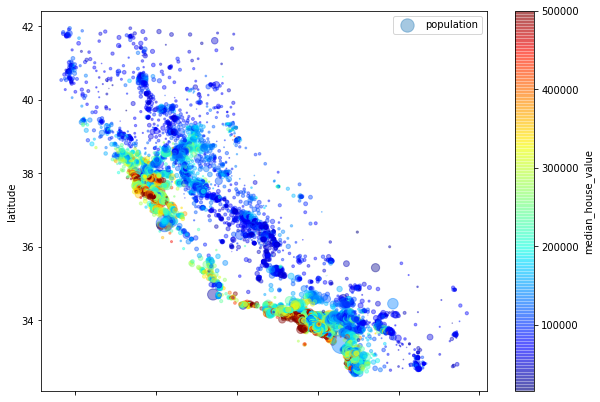

In [121]:
data_new.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                s=data_new["population"]/100,label="population",figsize=(10,7),
                c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [122]:
"""import seaborn as sns
sns.set(style="ticks")
plot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]
sns.pairplot(plot_vars)
"""

'import seaborn as sns\nsns.set(style="ticks")\nplot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]\nsns.pairplot(plot_vars)\n'

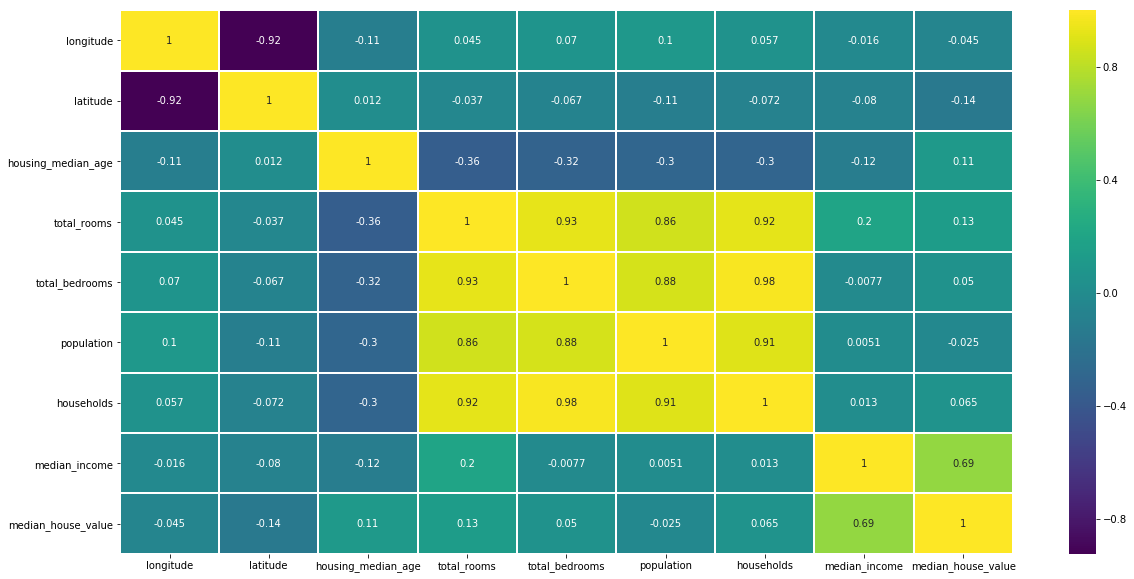

In [123]:
corr_matrix = data_new.iloc[:,[0,1,2,3,4,5,6,7,13]].corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');

In [124]:
rooms_combined = data_new.copy()
rooms_combined["bedr_per_rooms"] = rooms_combined["total_bedrooms"]/rooms_combined["total_rooms"]
rooms_combined.drop(["total_rooms","total_bedrooms"],axis=1,inplace=True)
rooms_combined = rooms_combined[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_combined.head()

,longitude,latitude,housing_median_age,bedr_per_rooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,0.146591,322,126,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,0.155797,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,0.129516,496,177,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,0.184458,558,219,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,0.172096,565,259,3.8462,0.0,0.0,0.0,1.0,0.0,342200


In [125]:
"""corr_matrix = rooms_combined.iloc[:,[0,1,2,3,4,5,6,12]].corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');
"""

"corr_matrix = rooms_combined.iloc[:,[0,1,2,3,4,5,6,12]].corr()\nplt.subplots(figsize=(20,10))\nsns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');\n"

In [126]:
rooms_pophouse_comb = rooms_combined.copy()
rooms_pophouse_comb["househ_per_pop"] = rooms_pophouse_comb["households"]/rooms_pophouse_comb["population"]
rooms_pophouse_comb = rooms_pophouse_comb[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_pophouse_comb.head()

,longitude,latitude,housing_median_age,bedr_per_rooms,househ_per_pop,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,0.146591,0.391304,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,0.155797,0.473969,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,0.129516,0.356855,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,0.184458,0.392473,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,0.172096,0.458407,3.8462,0.0,0.0,0.0,1.0,0.0,342200


In [127]:
#input_data.loc[:, input_data.columns != 'median_house_value']

In [128]:
class Analysis: 
    def __init__(self):
        self.results = pd.DataFrame() # contains the predicted ys
        self.input_data = {} # dict of dicts, contains the input data frames
        self.algo_names = [] # list of all algo names that were added
        self.algos = {} # dict of dicts, contains the algo names and algos
        self.analysis_summaries = {} # contains all analyses that have already been run and details about them 
                                        # (i.e. which algo and input data was used)

    def add_input_prep(self, input_data_name, input_data, colidx_with_cont_data = list(range(0,8))):
        """accepts an input data frame, splits in training and test, scales the continuous features,
        and stores the input df in input_data. colidx.. should be a list of column indices of continous features
        input_data should be a manipulated version of data_new (i.e. ocean proximity 
        already converted, NaNs in total bedrooms already dropped,index reset.)"""
        if input_data_name not in self.input_data:
            self.input_data[input_data_name] = {'raw_data': input_data}

            #split in train and test
            splitdata = {}
            self.input_data[input_data_name]["prep_data"] = splitdata
            splitdata["train_X"], splitdata["test_X"], splitdata["train_y"],splitdata["test_y"] = train_test_split(self.input_data[input_data_name]["raw_data"].loc[:, self.input_data[input_data_name]["raw_data"].columns != 'median_house_value'],\
                                                               self.input_data[input_data_name]["raw_data"]["median_house_value"], test_size=0.2, random_state=42)
            nr_features = splitdata["train_X"].shape[1]

            if colidx_with_cont_data:
                #standard scaling of continuous variables
                scaler = preprocessing.StandardScaler()
                train_df_cont = self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data]
                scaler.fit(train_df_cont) 
                self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data] = scaler.transform(train_df_cont)
                self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data] = scaler.transform(self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data])
            
            print(f"Input data: {input_data_name}.")
            print(f"Scaled {len(colidx_with_cont_data)} features.")
            print(f"The scaled features are: {splitdata['train_X'].iloc[:,colidx_with_cont_data].columns.values}")
            colindices = list(range(0,splitdata['train_X'].shape[1]))
            condition = [c not in colidx_with_cont_data for c in colindices]
            not_scaled = self.input_data[input_data_name]['prep_data']['train_X'].iloc[:,condition].columns.values 
            print(f"Did NOT scale these ones: {not_scaled}")
  
            return self.input_data
        else:
            print("Input data name already exists!")
    
    def run_analysis(self,analysis_name,input_data_name,algo_name,):
        """runs an analysis with a given input_data and algo_name. Calculates error rates and stores
        them in self.analysis_summaries. For LinReg, also calculates beta coefficients."""
        
        if analysis_name not in self.analysis_summaries:
            self.analysis_summaries[analysis_name] = {"input_data_name":input_data_name,"algo_name":algo_name,"fit":-1}
            
            # get the data from input_data
            train_X, test_X, train_y, test_y = self.input_data[input_data_name]['prep_data']["train_X"],\
                self.input_data[input_data_name]['prep_data']["test_X"],\
                self.input_data[input_data_name]['prep_data']["train_y"],\
                self.input_data[input_data_name]['prep_data']["test_y"]
            
            if self.analysis_summaries[analysis_name]['fit'] == -1:
                print("self analysis summary is -1")
                self.analysis_summaries[analysis_name]['fit'] = self.algos[algo_name]['algo'].fit(train_X, train_y) 
                pred = self.algos[algo_name]['algo'].predict(test_X)
                self.results[analysis_name] = pred 
                
                # error and r2 calculation
                mse= mean_squared_error(pred,test_y)
                rmse = np.sqrt(mse)
                self.analysis_summaries[analysis_name]["RMSE"] = rmse
                R2 = self.analysis_summaries[analysis_name]['fit'].score(test_X, test_y)
                self.analysis_summaries[analysis_name]["R2"] = R2
                rss = (sum((pred - test_y)**2))
                rse = np.sqrt(rss/(test_X.shape[0]-test_X.shape[1]))
                self.analysis_summaries[analysis_name]["RSE"] = rse
                print(f"RSE: {rse}")
                print(f"RMSE: {rmse}")
                print(f"R2: {R2}")
                if isinstance(self.algos[algo_name],linear_model.base.LinearRegression):
                    betas = self.analysis_summaries[analysis_name]['fit'].coef_
                    betas_df = pd.DataFrame(data = betas.reshape(1,train_X.shape[1]),columns = train_X.columns)
                    self.analysis_summaries[analysis_name]["betas"] = betas_df
        else: print("Analysis name already exists!")
    
    def run_all_combis(self):
        for i in self.input_data.keys():
            for a in self.algos:
                print(a)
                ananame = str(a) + "_" + str(i)
                print(f"\nRunning {ananame} analysis...")
                self.run_analysis(ananame,i,a)
                print("Finished!")
                      
    def calculate_error_rates(self):
        """returns a df with R2, RMSE and RSE for each analysis (i.e. each combination of 
        input_data and algo that was run with run_analysis)"""
        rates = pd.DataFrame(columns = ["Input DF","Algo Name","R2","RMSE","RSE"],index = self.analysis_summaries.keys())
        for ana in self.analysis_summaries:
            rates.loc[ana,"Input DF"] = self.analysis_summaries[ana]["input_data_name"]
            rates.loc[ana,"Algo Name"] = self.analysis_summaries[ana]["algo_name"]
            rates.loc[ana,"R2"] = self.analysis_summaries[ana]["R2"]
            rates.loc[ana,"RMSE"] = self.analysis_summaries[ana]["RMSE"]
            rates.loc[ana,"RSE"] = self.analysis_summaries[ana]["RSE"]
        #display(rates)
        return rates
    
    def pretty_barplots(self):
        "prints a barplot sumarizing the error rates and R2 for the analyses that were run before"
        pass
         
    def add_algo(self, algo, algo_name):
        """adds a new algo including its configurations (e.g. n_neighbors). Needs to be
        given a unique name"""
        if algo_name not in self.algo_names:
            self.algo_names.append(algo_name)
            self.algos[algo_name] = {'algo_name': algo_name, 'algo': algo}
        else: print("This algo config already exists!!")
            
    def delete_input_data(self,input_data_name):
        self.input_data.pop(input_data_name,None) # None means nothing happens if key not found
        print(f"{input_data_name} was deleted")
        
    def get_results(self):
        return self.results
        

In [129]:
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0,342200


In [130]:
analysis = Analysis()
analysis.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis.add_input_prep("no_coords",data_new.iloc[:,list(range(2,14))],list(range(0,6)))
analysis.add_input_prep("orig_data",data_new,list(range(0,8))) # is not added again (already exists)
analysis.add_input_prep("no_oceanprox",data_new.iloc[:,[0,1,2,3,4,5,6,7,13]],list(range(0,8)))
analysis.add_input_prep("only_income",data_new.iloc[:,[7,13]],[0])
analysis.add_input_prep("only_coords",data_new.iloc[:,[0,1,13]],[0,1])
analysis.add_input_prep("only_long",data_new.iloc[:,[0,13]],[0])
analysis.add_input_prep("rooms_combined",rooms_combined,list(range(0,7)))
analysis.add_input_prep("coords_income",data_new.iloc[:,[0,1,7,13]],[0,1,2])
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])

analysis.input_data

Input data: orig_data.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: no_coords.
Scaled 6 features.
The scaled features are: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data name already exists!
Input data: no_oceanprox.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: []
Input data: only_income.
Scaled 1 features.
The scaled features are: ['median_income']
Did NOT scale these ones: []
Input data: only_coords.
Scaled 2 features.
The scaled features are: ['longitude' 'latitude']
Did NOT scale these ones

{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [131]:
analysis.add_algo(KNeighborsRegressor(n_neighbors=1), 'knr_1') 
analysis.add_algo(KNeighborsRegressor(n_neighbors=2), 'knr_2')
analysis.add_algo(KNeighborsRegressor(n_neighbors=3), 'knr_3')
analysis.add_algo(KNeighborsRegressor(n_neighbors=4), 'knr_4')
analysis.add_algo(KNeighborsRegressor(n_neighbors=5), 'knr_5')
analysis.add_algo(KNeighborsRegressor(n_neighbors=6), 'knr_6')
analysis.add_algo(KNeighborsRegressor(n_neighbors=7), 'knr_7')
analysis.add_algo(KNeighborsRegressor(n_neighbors=10), 'knr_10')
analysis.add_algo(KNeighborsRegressor(n_neighbors=125), 'knr_125')
analysis.add_algo(linear_model.LinearRegression(),'standard_linreg')
analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

In [132]:
analysis.delete_input_data('rooms_pophouse_comb')

rooms_pophouse_comb was deleted


In [133]:
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])

Input data: rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms'
 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [134]:
analysis.run_all_combis()

knr_1

Running knr_1_orig_data analysis...
self analysis summary is -1
RSE: 74209.67083971556
RMSE: 74091.55313755218
R2: 0.5985750878017553
Finished!
knr_2

Running knr_2_orig_data analysis...
self analysis summary is -1
RSE: 66337.71388842567
RMSE: 66232.12578592356
R2: 0.6792221942252004
Finished!
knr_3

Running knr_3_orig_data analysis...
self analysis summary is -1
RSE: 64063.79838025919
RMSE: 63961.82961296867
R2: 0.7008364487866838
Finished!
knr_4

Running knr_4_orig_data analysis...
self analysis summary is -1
RSE: 62537.10077992321
RMSE: 62437.5620195366
R2: 0.7149252202266573
Finished!
knr_5

Running knr_5_orig_data analysis...
self analysis summary is -1
RSE: 62360.257805145724
RMSE: 62261.00052135916
R2: 0.7165352146660182
Finished!
knr_6

Running knr_6_orig_data analysis...
self analysis summary is -1
RSE: 62107.88251316692
RMSE: 62009.02692890537
R2: 0.7188249661318942
Finished!
knr_7

Running knr_7_orig_data analysis...
self analysis summary is -1
RSE: 61483.40459706858


RSE: 105564.33626828689
RMSE: 105551.42082977715
R2: 0.18530492477651395
Finished!
knr_6

Running knr_6_only_long analysis...
self analysis summary is -1
RSE: 104239.53218356323
RMSE: 104226.77883033942
R2: 0.20562502278353367
Finished!
knr_7

Running knr_7_only_long analysis...
self analysis summary is -1
RSE: 103236.52057868065
RMSE: 103223.88994052503
R2: 0.22083871349445416
Finished!
knr_10

Running knr_10_only_long analysis...
self analysis summary is -1
RSE: 101196.01151998973
RMSE: 101183.63053119679
R2: 0.2513351561744186
Finished!
knr_125

Running knr_125_only_long analysis...
self analysis summary is -1
RSE: 97264.8592021637
RMSE: 97252.95917652412
R2: 0.30837199035498086
Finished!
standard_linreg

Running standard_linreg_only_long analysis...
self analysis summary is -1
RSE: 116900.61242042198
RMSE: 116886.31002697257
R2: 0.0009339046062319944
Finished!
knr_1

Running knr_1_rooms_combined analysis...
self analysis summary is -1
RSE: 74783.24307786762
RMSE: 74673.37537444863


In [135]:
res_allcombis = analysis.calculate_error_rates()

In [136]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300):
    display(res_allcombis.sort_values(["R2","RMSE"],ascending=[False,True]))

,Input DF,Algo Name,R2,RMSE,RSE
knr_10_only_coords,only_coords,knr_10,0.796577,52743.2,52756.1
knr_6_only_coords,only_coords,knr_6,0.795515,52880.7,52893.6
knr_7_only_coords,only_coords,knr_7,0.794802,52972.9,52985.8
knr_5_only_coords,only_coords,knr_5,0.794284,53039.7,53052.7
knr_4_only_coords,only_coords,knr_4,0.789907,53600.9,53614.1
knr_3_only_coords,only_coords,knr_3,0.784724,54258.1,54271.4
knr_6_coords_income,coords_income,knr_6,0.768301,56289.7,56310.4
knr_7_coords_income,coords_income,knr_7,0.767196,56423.7,56444.5
knr_10_rooms_pophouse_comb,rooms_pophouse_comb,knr_10,0.766324,56529.3,56605.5
knr_10_coords_income,coords_income,knr_10,0.766285,56534,56554.7


In [55]:
#analysis.run_analysis('knr1_orig','orig_data','knr_1')

In [137]:
best_r2 = res_allcombis.sort_values("R2",ascending=False).iloc[0:15,:]
#display(best_r2)
lowest_rmse = res_allcombis.sort_values("RMSE").iloc[0:15,:]
#display(lowest_rmse)

# Pickling of the created analysis object

In [138]:
# open the file for writing
fileObject = open("analysis_pickled",'wb') 
# this writes the object analysis to the
# file named 'analysis_pickled'
pickle.dump(analysis,fileObject)
# here we close the fileObject
fileObject.close()

In [75]:
# we open the file for reading
fileObject = open("analysis_pickled",'rb')  
# load the object from the file into var b
loaded_analysis = pickle.load(fileObject)
# here we close the fileObject
fileObject.close()

In [76]:
loaded_analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

# ToDo

In [139]:
# incorporate feature selector for LinReg

#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html